## 计算沉积能量Q

### 准备


In [1]:
TFile *ipf = new TFile("AddVeto.root");
TTree *fChain = (TTree*)ipf->Get("tree");
Int_t iqu, iqd;
fChain->SetBranchAddress("iqu", &iqu);
fChain->SetBranchAddress("iqd", &iqd);

// new file
TFile *opf = new TFile("QProcessor.root", "recreate");
TTree *opt = new TTree("tree", "q process step 1");
// new data
Double_t q0;
// new branch
opt->Branch("q0", &q0, "q0/D");

fChain->AddFriend(opt);

TCanvas *c1 = new TCanvas;

### 处理qu

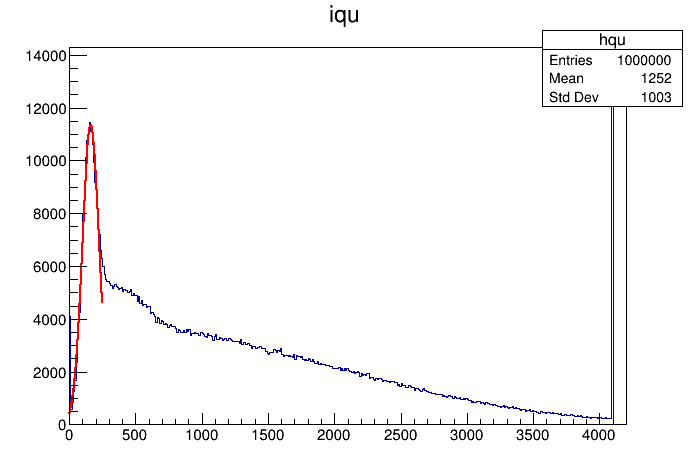

 FCN=4174.95 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=9.66525e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.13338e+04   3.58086e+01   8.82618e-01  -3.34682e-06
   2  Mean         1.63521e+02   2.35733e-01   5.83551e-03   4.96804e-04
   3  Sigma        6.36360e+01   2.00177e-01   2.27586e-05  -1.89780e-01


In [2]:
fChain->Draw("iqu >> hqu(420, 0, 4200)", "", "goff");
TH1D *hqu = (TH1D*)gDirectory->Get("hqu");
TF1 *f1 = new TF1("f1", "gaus", 0, 250);
hqu->Fit(f1, "R");
Double_t pedUSigma = f1->GetParameter(2);
Double_t pedU = f1->GetParameter(1);
TString sPedU(Form("%lf", pedU));
TString squLimit(Form("iqu > %lf+3.0*%lf && iqu < 4095", pedU, pedUSigma));
opt->SetAlias("qua", ("iqu-"+sPedU).Data());
opt->SetAlias("quLimit", squLimit.Data());
delete f1;
c1->Draw();

### 计算qd

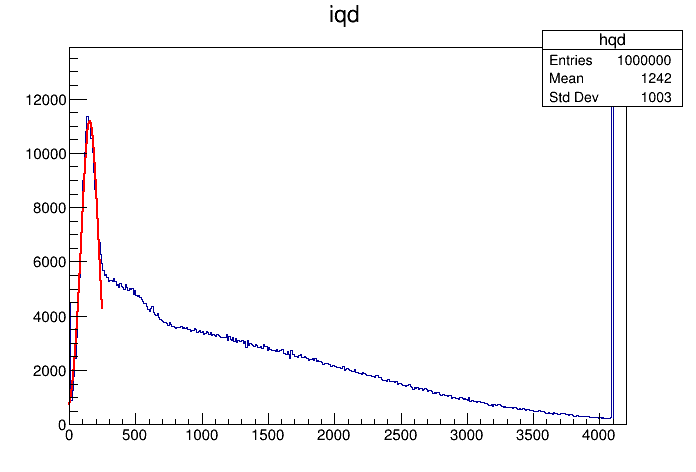

 FCN=4250.15 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=6.0649e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.11845e+04   3.55511e+01   8.63344e-01  -9.09211e-07
   2  Mean         1.56320e+02   2.34949e-01   6.12045e-03  -4.27659e-04
   3  Sigma        6.65998e+01   2.15510e-01   2.42493e-05   8.41702e-02


In [3]:
fChain->Draw("iqd >> hqd(420, 0, 4200)", "", "goff");
TH1D *hqd = (TH1D*)gDirectory->Get("hqd");
f1 = new TF1("f1", "gaus", 0, 250);
hqd->Fit(f1, "R");
Double_t pedDSigma = f1->GetParameter(2);
Double_t pedD = f1->GetParameter(1);
TString sPedD{Form("%lf", pedD)};
TString sqdLimit(Form("iqd > %lf+3.0*%lf && iqd < 4095", pedD, pedDSigma));
opt->SetAlias("qda", ("iqd-"+sPedD).Data());
opt->SetAlias("qdLimit", sqdLimit.Data());
opt->SetAlias("qLimit", "qdLimit && quLimit");
delete f1;
c1->Draw();

### 存储

In [4]:
Long64_t nentries = fChain->GetEntries();
for (Long64_t jentry = 0; jentry != nentries; ++jentry) {
    fChain->GetEntry(jentry);
    q0 = sqrt((iqu-pedUSigma) * (iqd-pedDSigma));
    opt->Fill();
}

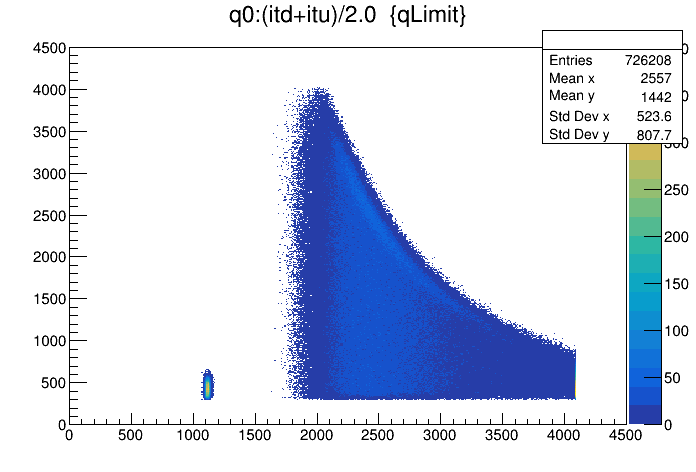

In [5]:
fChain->Draw("q0:(itd+itu)/2.0 >> (450, 0, 4500, 450, 0, 4500) ", "qLimit", "colz");
c1->Draw();

In [6]:
opt->Write();
opf->Close();

<div>
    <span style="float:left"><a href="hw1_2_3.ipynb">prev</a></span>
    <span style="float:right"><a href="hw1_2_5.ipynb">next</a></span>
</div>